In [9]:

import pandas as pd

In [10]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [11]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [13]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:

data = pd.merge(pd.merge(ratings, users), movies)

In [15]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [16]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')


In [17]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [18]:
ratings_by_title = data.groupby('title').size()

In [19]:
ratings_by_title[:5]


title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [12]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]


In [13]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

In [14]:
mean_ratings = mean_ratings.loc[active_titles]

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [16]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [17]:
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [18]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [19]:
top_male_ratings[:5]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


In [20]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [21]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [22]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [23]:

sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [24]:
data[:1000]



,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
995,3592,1193,5,966645044,F,56,2,99701,One Flew Over the Cuckoo's Nest (1975),Drama
996,3594,1193,4,966633918,M,1,0,02322,One Flew Over the Cuckoo's Nest (1975),Drama
997,3596,1193,5,966631494,F,35,4,19104,One Flew Over the Cuckoo's Nest (1975),Drama
998,3600,1193,5,966622931,M,35,20,94506,One Flew Over the Cuckoo's Nest (1975),Drama


In [55]:
genre_ratings = data.groupby('genres').size().sort_values(ascending=False)

In [58]:
genre_ratings


genres
Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Length: 301, dtype: int64

In [57]:
print("This is how many ratings are per genre -- Question1")

This is how many ratings are per genre -- Question1


In [27]:
female_data= data[['genres', 'rating']].loc[data['gender'] == 'F']

In [28]:
female_top_five = female_data.groupby('genres').size().sort_values(ascending=False)

In [29]:
female_top_five[:5]

genres
Drama             32852
Comedy            29208
Comedy|Romance    15600
Comedy|Drama      12308
Drama|Romance     11749
dtype: int64

In [30]:
male_data= data[['genres', 'rating']].loc[data['gender'] == 'M']

In [31]:
male_top_five = male_data.groupby('genres').size().sort_values(ascending=False)


In [32]:
male_top_five[:5]

genres
Comedy             87675
Drama              78571
Comedy|Drama       29937
Comedy|Romance     27112
Action|Thriller    21929
dtype: int64

In [41]:
nest= data[['title','age', 'movie_id','rating' ]].loc[(data['movie_id'] == 1193)]

In [42]:
nest['under_18'] = nest[['rating']].loc[nest['age'] <18]

In [43]:
nest['between_19_and_45'] = nest[['rating']].loc[(nest['age'] > 18) & (nest['age'] < 45)]

In [44]:
nest['over_45'] = nest[['rating']].loc[nest['age'] >45]

In [45]:
nest_age_ratings = nest[['title','under_18','between_19_and_45', 'over_45']]


In [46]:
nest_age_ratings

,title,under_18,between_19_and_45,over_45
0,One Flew Over the Cuckoo's Nest (1975),5.0,NaN,NaN
1,One Flew Over the Cuckoo's Nest (1975),NaN,NaN,5.0
2,One Flew Over the Cuckoo's Nest (1975),NaN,4.0,NaN
3,One Flew Over the Cuckoo's Nest (1975),NaN,4.0,NaN
4,One Flew Over the Cuckoo's Nest (1975),NaN,NaN,5.0
...,...,...,...,...
1720,One Flew Over the Cuckoo's Nest (1975),NaN,NaN,5.0
1721,One Flew Over the Cuckoo's Nest (1975),NaN,5.0,NaN
1722,One Flew Over the Cuckoo's Nest (1975),NaN,5.0,NaN
1723,One Flew Over the Cuckoo's Nest (1975),NaN,NaN,NaN


In [51]:
def function(user, movieNum): 
    
    
    movies = data[['user_id', 'rating']].loc[data['movie_id'] == movieNum]

    ratingNum = movies[['rating']].loc[movies['user_id'] == user].values[0][0]
    

    allUsers = movies[['user_id']].loc[movies['rating'] == ratingNum]
    
    
    
    return allUsers


In [52]:
function(1,1)

,user_id
41626,1
41629,9
41630,10
41632,19
41637,34
...,...
43693,6011
43694,6013
43695,6015
43698,6022


In [48]:
plotChart = data.groupby('age')['rating'].mean()

In [158]:
plotChart

age
1     3.549520
18    3.507573
25    3.545235
35    3.618162
45    3.638062
50    3.714512
56    3.766632
Name: rating, dtype: float64

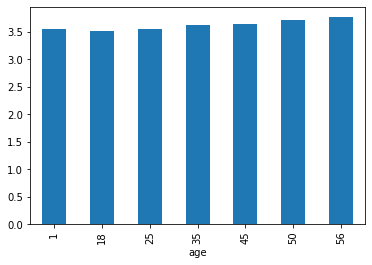

In [169]:
import matplotlib.pyplot 
plotChart.plot.bar()



In [53]:
print("This is a box plot which shows the average ratings per age group. I questioned if maybe different age groups were more likely to rate movies more harshly than others -- which this graph clearly indicates that no age group rates more strictly than others. The next step is to see average age group ratings per genre. ")

This is a box plot which shows the average ratings per age group. I questioned if maybe different age groups were more likely to rate movies more harshly than others -- which this graph clearly indicates that no age group rates more strictly than others. The next step is to see average age group ratings per genre. 
